# 주제선정: ABC 다국적 은행의 가입고객 이탈예측

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# font_path = '/Library/Fonts/Arial Unicode.ttf'      # mac 폰트 추가
font_path = 'C:\\Windows\\Fonts\\malgun.TTF'          # 한글 폰트를 적용하여 시각화
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

# warnings 무시하기
import warnings
warnings.filterwarnings('ignore')

# 새 csv 파일을 호출
df = pd.read_csv("./data/Transformed_Bank_Customer_Churn_Prediction.csv")
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


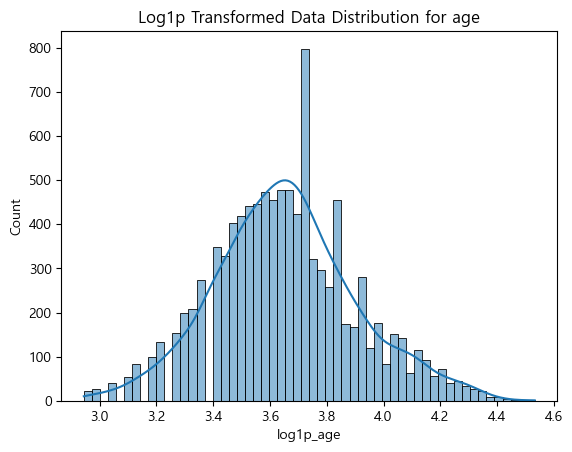

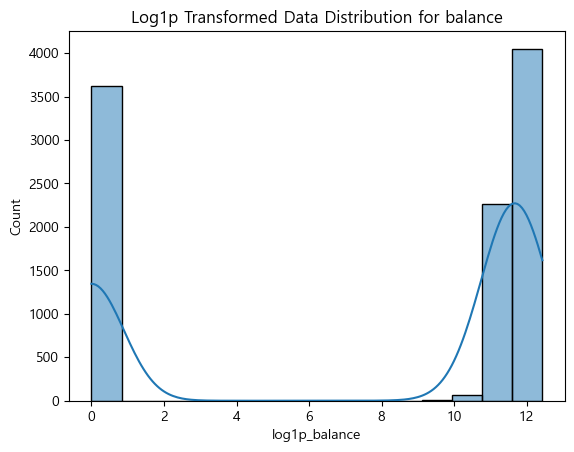

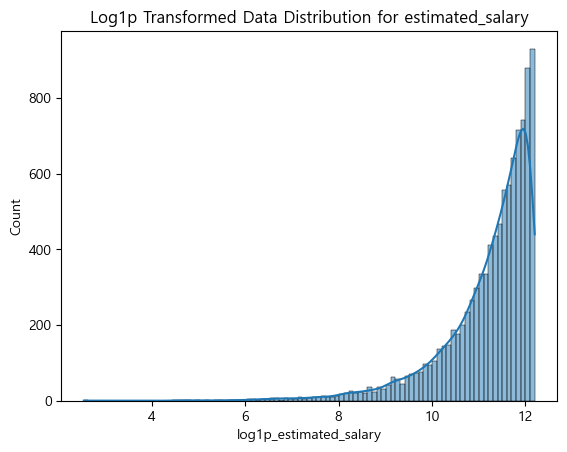

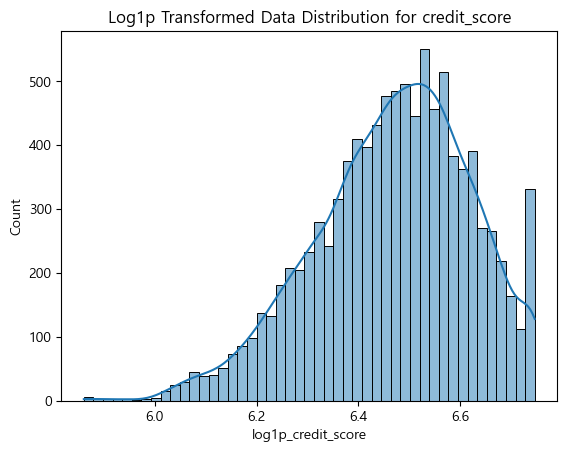

   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       1   42       2       0.00                1   
1           608        2       1   41       1   83807.86                1   
2           502        0       1   42       8  159660.80                3   
3           699        0       1   39       1       0.00                2   
4           850        2       1   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  log1p_age  \
0            1              1         101348.88      1   3.761200   
1            0              1         112542.58      0   3.737670   
2            1              0         113931.57      1   3.761200   
3            0              0          93826.63      0   3.688879   
4            1              1          79084.10      0   3.784190   

   log1p_balance  log1p_estimated_salary  log1p_credit_score  
0       0.000000               11.526334            6.42971

In [77]:
# 'balance'와 'estimated_salary' 컬럼을 skewed_columns 리스트에 추가
skewed_columns = ['age', 'balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가

# log1p 변환 함수
def log1p_transform_columns(df, columns):
    for column in columns:
        df[f'log1p_{column}'] = np.log1p(df[column])  # np.log1p는 log(x+1)
    return df

# log1p 변환 수행
df = log1p_transform_columns(df, skewed_columns)

# log1p 변환 후 데이터 분포 시각화
for column in skewed_columns:
    sns.histplot(df[f'log1p_{column}'], kde=True)
    plt.title(f'Log1p Transformed Data Distribution for {column}')
    plt.show()

# 결과 출력
print(df.head())

# 변환된 'log1p_' 컬럼을 원래 컬럼에 대체하고, 불필요한 컬럼 제거
for column in skewed_columns:
    df[column] = df[f'log1p_{column}']
    df.drop([f'log1p_{column}'], axis=1, inplace=True)

# 최종 데이터 확인
print(df.head())

In [78]:
def evaluation(model, X_test, y_test, thresholds=0.5):
    # 예측 결과
    y_pred = model.predict(X_test)

    # 정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(f"정확도: {accuracy * 100:.4f}%")

    # 혼동 행렬
    cm = confusion_matrix(y_test, y_pred)
    print("혼동 행렬:\n", cm)

    # 정밀도: 정밀도는 예측한 클래스 1 중에서 실제로 클래스 1인 비율
    precision = precision_score(y_test, y_pred)
    print(f"정밀도: {precision:.4f}")

    # 재현율: 재현율은 실제 클래스 1 중에서 모델이 클래스 1로 예측한 비율
    recall = recall_score(y_test, y_pred)
    print(f"재현율: {recall:.4f}")

    # F1 점수: F1 점수는 정밀도와 재현율의 조화 평균, 두 지표의 균형을 맞추기 위한 지표
    f1 = f1_score(y_test, y_pred)
    print(f"F1 점수: {f1:.4f}")

    # ROC AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    # ROC 곡선 그리기
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

---

- SVC

In [79]:
from sklearn.svm import SVC

# 데이터 준비
X = df.drop('churn', axis=1)
y = df['churn']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard 정규화
standard_x = StandardScaler()
X_train_standard = standard_x.fit_transform(X_train)
X_test_standard = standard_x.transform(X_test)

# MinMax 정규화
minmax_x = MinMaxScaler()
X_train_minmax = minmax_x.fit_transform(X_train)
X_test_minmax = minmax_x.transform(X_test)

# 모델 학습 및 예측
svc_rbf = SVC(kernel='rbf', C=1.0, probability=True)
svc_poly = SVC(kernel='poly', C=1.0, probability=True)

In [80]:
# 원본 데이터

# 학습
svc_rbf.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)

# 예측
rbf_pred = svc_rbf.predict(X_test)
poly_pred = svc_poly.predict(X_test)

# 정확도 (Accuracy)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
poly_accuracy = accuracy_score(y_test, poly_pred)

# 정밀도 (Precision)
rbf_precision = precision_score(y_test, rbf_pred)
poly_precision = precision_score(y_test, poly_pred)

# 재현율 (Recall)
rbf_recall = recall_score(y_test, rbf_pred)
poly_recall = recall_score(y_test, poly_pred)

# F1 Score
rbf_f1 = f1_score(y_test, rbf_pred)
poly_f1 = f1_score(y_test, poly_pred)

# 모델 평가
print(f'정확도: {rbf_accuracy * 100:.4f} %')
print(f"정밀도: {rbf_precision * 100:.4f} %")
print(f'재현율: {rbf_recall * 100:.4f} %')
print(f"F1 Score Rate: {rbf_f1 * 100:.4f} %")

print(f'정확도: {poly_accuracy * 100:.4f} %')
print(f"정밀도: {poly_precision * 100:.4f} %")
print(f'재현율: {poly_recall * 100:.4f} %')
print(f"F1 Score Rate: {poly_f1 * 100:.4f} %")

정확도: 80.5333 %
정밀도: 0.0000 %
재현율: 0.0000 %
F1 Score Rate: 0.0000 %
정확도: 80.5333 %
정밀도: 0.0000 %
재현율: 0.0000 %
F1 Score Rate: 0.0000 %


In [81]:
# 원본 데이터

# 학습
svc_rbf.fit(X_train, y_train)
svc_poly.fit(X_train, y_train)

# 예측
rbf_pred = svc_rbf.predict(X_test)
poly_pred = svc_poly.predict(X_test)

# 정확도 (Accuracy)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
poly_accuracy = accuracy_score(y_test, poly_pred)

# 정밀도 (Precision)
rbf_precision = precision_score(y_test, rbf_pred)
poly_precision = precision_score(y_test, poly_pred)

# 재현율 (Recall)
rbf_recall = recall_score(y_test, rbf_pred)
poly_recall = recall_score(y_test, poly_pred)

# F1 Score
rbf_f1 = f1_score(y_test, rbf_pred)
poly_f1 = f1_score(y_test, poly_pred)

# 모델 평가
print(f'정확도: {rbf_accuracy * 100:.4f} %')
print(f"정밀도: {rbf_precision * 100:.4f} %")
print(f'재현율: {rbf_recall * 100:.4f} %')
print(f"F1 Score Rate: {rbf_f1 * 100:.4f} %")

print(f'정확도: {poly_accuracy * 100:.4f} %')
print(f"정밀도: {poly_precision * 100:.4f} %")
print(f'재현율: {poly_recall * 100:.4f} %')
print(f"F1 Score Rate: {poly_f1 * 100:.4f} %")

정확도: 80.5333 %
정밀도: 0.0000 %
재현율: 0.0000 %
F1 Score Rate: 0.0000 %
정확도: 80.5333 %
정밀도: 0.0000 %
재현율: 0.0000 %
F1 Score Rate: 0.0000 %


In [82]:
# Standard 정규화

# 학습
svc_rbf.fit(X_train_standard, y_train)
svc_poly.fit(X_train_standard, y_train)

# 예측
rbf_pred = svc_rbf.predict(X_test_standard)
poly_pred = svc_poly.predict(X_test_standard)

# 정확도 (Accuracy)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
poly_accuracy = accuracy_score(y_test, poly_pred)

# 정밀도 (Precision)
rbf_precision = precision_score(y_test, rbf_pred)
poly_precision = precision_score(y_test, poly_pred)

# 재현율 (Recall)
rbf_recall = recall_score(y_test, rbf_pred)
poly_recall = recall_score(y_test, poly_pred)

# F1 Score
rbf_f1 = f1_score(y_test, rbf_pred)
poly_f1 = f1_score(y_test, poly_pred)

# 모델 평가
print(f'정확도: {rbf_accuracy * 100:.4f} %')
print("분류 결과:")
print(classification_report(y_test, rbf_pred))
print("혼동 행렬:")
print(confusion_matrix(y_test, rbf_pred))

print(f'정확도: {poly_accuracy * 100:.4f} %')
print("분류 결과:")
print(classification_report(y_test, poly_pred))
print("혼동 행렬:")
print(confusion_matrix(y_test, poly_pred))

정확도: 86.4333 %
분류 결과:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.84      0.38      0.52       584

    accuracy                           0.86      3000
   macro avg       0.85      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000

혼동 행렬:
[[2374   42]
 [ 365  219]]
정확도: 86.0000 %
분류 결과:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2416
           1       0.87      0.33      0.48       584

    accuracy                           0.86      3000
   macro avg       0.86      0.66      0.70      3000
weighted avg       0.86      0.86      0.83      3000

혼동 행렬:
[[2386   30]
 [ 390  194]]


정확도: 86.4333%
혼동 행렬:
 [[2374   42]
 [ 365  219]]
정밀도: 0.8391
재현율: 0.3750
F1 점수: 0.5183
AUC: 0.8222


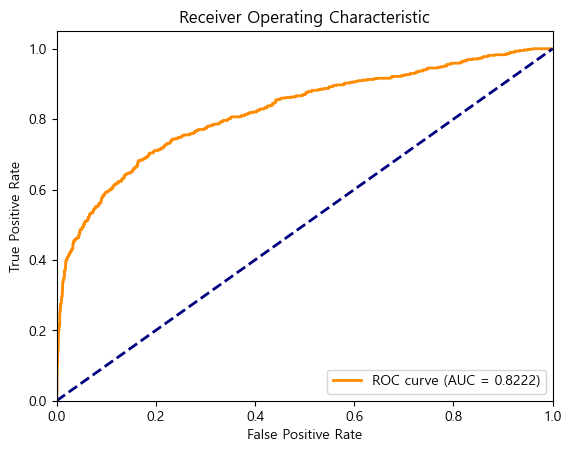

In [83]:
# 정확도 평가: Standard 정규화
evaluation(svc_rbf, X_test_standard, y_test)

정확도: 86.0000%
혼동 행렬:
 [[2386   30]
 [ 390  194]]
정밀도: 0.8661
재현율: 0.3322
F1 점수: 0.4802
AUC: 0.8293


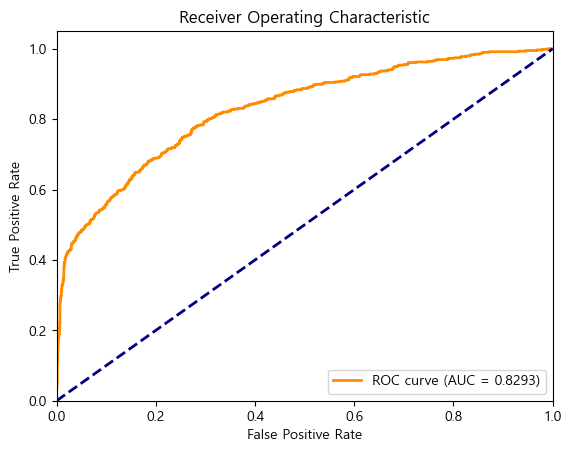

In [84]:
# 정확도 평가: Standard 정규화
evaluation(svc_poly, X_test_standard, y_test)

In [85]:
# MinMax 정규화

# 학습
svc_rbf.fit(X_train_minmax, y_train)
svc_poly.fit(X_train_minmax, y_train)

# 예측
rbf_pred = svc_rbf.predict(X_test_minmax)
poly_pred = svc_poly.predict(X_test_minmax)

# 정확도 (Accuracy)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
poly_accuracy = accuracy_score(y_test, poly_pred)

# 정밀도 (Precision)
rbf_precision = precision_score(y_test, rbf_pred)
poly_precision = precision_score(y_test, poly_pred)

# 재현율 (Recall)
rbf_recall = recall_score(y_test, rbf_pred)
poly_recall = recall_score(y_test, poly_pred)

# F1 Score
rbf_f1 = f1_score(y_test, rbf_pred)
poly_f1 = f1_score(y_test, poly_pred)

# 모델 평가
print(f'정확도: {rbf_accuracy * 100:.4f} %')
print(f"정밀도: {rbf_precision * 100:.4f} %")
print(f'재현율: {rbf_recall * 100:.4f} %')
print(f"F1 Score Rate: {rbf_f1 * 100:.4f} %")

print(f'정확도: {poly_accuracy * 100:.4f} %')
print(f"정밀도: {poly_precision * 100:.4f} %")
print(f'재현율: {poly_recall * 100:.4f} %')
print(f"F1 Score Rate: {poly_f1 * 100:.4f} %")

정확도: 85.8667 %
정밀도: 88.4615 %
재현율: 31.5068 %
F1 Score Rate: 46.4646 %
정확도: 86.3000 %
정밀도: 85.5967 %
재현율: 35.6164 %
F1 Score Rate: 50.3023 %


- Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

# 모델 학습 및 예측
gnb = GaussianNB()

In [87]:
# 원본 데이터

# 학습
gnb.fit(X_train, y_train)

# 예측
gnb_pred = gnb.predict(X_test)

# 정확도 (Accuracy)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

# 정밀도 (Precision)
gnb_precision = precision_score(y_test, gnb_pred)

# 재현율 (Recall)
gnb_recall = recall_score(y_test, gnb_pred)

# F1 Score
gnb_f1 = f1_score(y_test, gnb_pred)

# 모델 평가
print(f'정확도: {gnb_accuracy * 100:.4f} %')
print(f"정밀도: {gnb_precision * 100:.4f} %")
print(f'재현율: {gnb_recall * 100:.4f} %')
print(f"F1 Score Rate: {gnb_f1 * 100:.4f} %")

정확도: 84.5667 %
정밀도: 78.9474 %
재현율: 28.2534 %
F1 Score Rate: 41.6141 %


In [88]:
# Standard 정규화

# 학습
gnb.fit(X_train_standard, y_train)

# 예측
gnb_pred = gnb.predict(X_test_standard)

# 정확도 (Accuracy)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

# 정밀도 (Precision)
gnb_precision = precision_score(y_test, gnb_pred)

# 재현율 (Recall)
gnb_recall = recall_score(y_test, gnb_pred)

# F1 Score
gnb_f1 = f1_score(y_test, gnb_pred)

# 모델 평가
print(f'정확도: {gnb_accuracy * 100:.4f} %')
print("분류 결과:")
print(classification_report(y_test, gnb_pred))
print("혼동 행렬:")
print(confusion_matrix(y_test, gnb_pred))

정확도: 84.5667 %
분류 결과:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2416
           1       0.79      0.28      0.42       584

    accuracy                           0.85      3000
   macro avg       0.82      0.63      0.66      3000
weighted avg       0.84      0.85      0.81      3000

혼동 행렬:
[[2372   44]
 [ 419  165]]


정확도: 84.5667%
혼동 행렬:
 [[2372   44]
 [ 419  165]]
정밀도: 0.7895
재현율: 0.2825
F1 점수: 0.4161
AUC: 0.8026


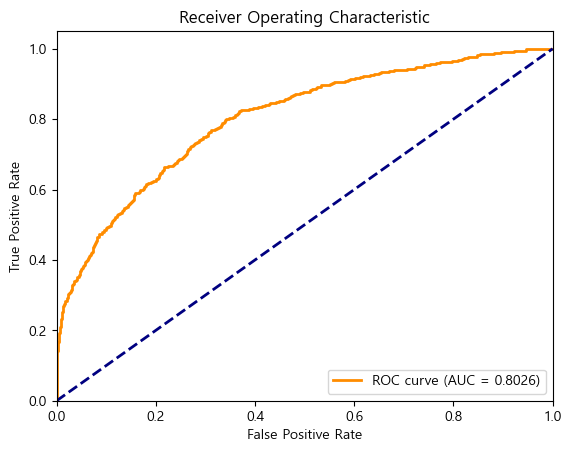

In [89]:
# 정확도 평가: Standard 정규화
evaluation(gnb, X_test_standard, y_test)

In [90]:
# MinMax 정규화

# 학습
gnb.fit(X_train_minmax, y_train)

# 예측
gnb_pred = gnb.predict(X_test_minmax)

# 정확도 (Accuracy)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

# 정밀도 (Precision)
gnb_precision = precision_score(y_test, gnb_pred)

# 재현율 (Recall)
gnb_recall = recall_score(y_test, gnb_pred)

# F1 Score
gnb_f1 = f1_score(y_test, gnb_pred)

# 모델 평가
print(f'정확도: {gnb_accuracy * 100:.4f} %')
print(f"정밀도: {gnb_precision * 100:.4f} %")
print(f'재현율: {gnb_recall * 100:.4f} %')
print(f"F1 Score Rate: {gnb_f1 * 100:.4f} %")

정확도: 84.5667 %
정밀도: 78.9474 %
재현율: 28.2534 %
F1 Score Rate: 41.6141 %


- AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier

# 모델 학습 및 예측
abc = AdaBoostClassifier()

In [92]:
# 원본 데이터

# 학습
abc.fit(X_train, y_train)

# 예측
abc_pred = abc.predict(X_test)

# 정확도 (Accuracy)
abc_accuracy = accuracy_score(y_test, abc_pred)

# 정밀도 (Precision)
abc_precision = precision_score(y_test, abc_pred)

# 재현율 (Recall)
abc_recall = recall_score(y_test, abc_pred)

# F1 Score
abc_f1 = f1_score(y_test, abc_pred)

# 모델 평가
print(f'정확도: {abc_accuracy * 100:.4f} %')
print(f"정밀도: {abc_precision * 100:.4f} %")
print(f'재현율: {abc_recall * 100:.4f} %')
print(f"F1 Score Rate: {abc_f1 * 100:.4f} %")

정확도: 86.0667 %
정밀도: 73.0556 %
재현율: 45.0342 %
F1 Score Rate: 55.7203 %


In [93]:
# Standard 정규화

# 학습
abc.fit(X_train_standard, y_train)

# 예측
abc_pred = abc.predict(X_test_standard)

# 정확도 (Accuracy)
abc_accuracy = accuracy_score(y_test, abc_pred)

# 정밀도 (Precision)
abc_precision = precision_score(y_test, abc_pred)

# 재현율 (Recall)
abc_recall = recall_score(y_test, abc_pred)

# F1 Score
abc_f1 = f1_score(y_test, abc_pred)

# 모델 평가
print(f'정확도: {abc_accuracy * 100:.4f} %')
print("분류 결과:")
print(classification_report(y_test, abc_pred))
print("혼동 행렬:")
print(confusion_matrix(y_test, abc_pred))

정확도: 86.0667 %
분류 결과:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.45      0.56       584

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

혼동 행렬:
[[2319   97]
 [ 321  263]]


정확도: 86.0667%
혼동 행렬:
 [[2319   97]
 [ 321  263]]
정밀도: 0.7306
재현율: 0.4503
F1 점수: 0.5572
AUC: 0.8425


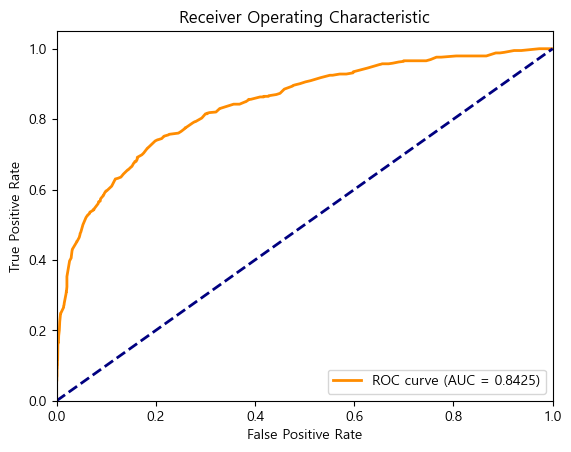

In [94]:
# 정확도 평가: Standard 정규화
evaluation(abc, X_test_standard, y_test)

In [95]:
# MinMax 정규화

# 학습
abc.fit(X_train_minmax, y_train)

# 예측
abc_pred = abc.predict(X_test_minmax)

# 정확도 (Accuracy)
abc_accuracy = accuracy_score(y_test, abc_pred)

# 정밀도 (Precision)
abc_precision = precision_score(y_test, abc_pred)

# 재현율 (Recall)
abc_recall = recall_score(y_test, abc_pred)

# F1 Score
abc_f1 = f1_score(y_test, abc_pred)

# 모델 평가
print(f'정확도: {abc_accuracy * 100:.4f} %')
print(f"정밀도: {abc_precision * 100:.4f} %")
print(f'재현율: {abc_recall * 100:.4f} %')
print(f"F1 Score Rate: {abc_f1 * 100:.4f} %")

정확도: 86.0667 %
정밀도: 73.0556 %
재현율: 45.0342 %
F1 Score Rate: 55.7203 %


- SVR

In [96]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_squared_log_error, root_mean_squared_log_error, r2_score

# 데이터 준비
X = df.drop('churn', axis=1)
y = df['churn']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 학습 및 예측
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_poly = SVR(kernel='poly', C=1.0, epsilon=0.1)

# 학습
svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

# 예측
rbf_pred = svr_rbf.predict(X_test)
poly_pred = svr_poly.predict(X_test)

# 회귀 평가 지표 계산
rbf_mse = mean_squared_error(y_test, rbf_pred)
rbf_rmse = root_mean_squared_error(y_test, rbf_pred)
rbf_msle = mean_squared_log_error(y_test, rbf_pred)
rbf_rmsle = root_mean_squared_log_error(y_test, rbf_pred)
rbf_r2 = r2_score(y_test, rbf_pred)

poly_mse = mean_squared_error(y_test, poly_pred)
poly_rmse = root_mean_squared_error(y_test, poly_pred)
poly_msle = mean_squared_log_error(y_test, poly_pred)
poly_rmsle = root_mean_squared_log_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

print("RBF SVR:")
print(f"MSE: {rbf_mse}")
print(f"RMSE: {rbf_rmse}")
print(f"MSLE: {rbf_mse}")
print(f"RMSLE: {rbf_rmse}")
print(f"R2 Score: {rbf_r2}")

print("\nPolynomial SVR:")
print(f"MSE: {poly_mse}")
print(f"RMSE: {poly_rmse}")
print(f"MSLE: {poly_mse}")
print(f"RMSLE: {poly_rmse}")
print(f"R2 Score: {poly_r2}")

RBF SVR:
MSE: 0.16128880168171986
RMSE: 0.4016077709428938
MSLE: 0.16128880168171986
RMSLE: 0.4016077709428938
R2 Score: -0.028814194706153096

Polynomial SVR:
MSE: 0.15333949137764996
RMSE: 0.39158586718323984
MSLE: 0.15333949137764996
RMSLE: 0.39158586718323984
R2 Score: 0.021892135762404896
